# Stacking with Area and Bar Plots

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

In [2]:
df = pd.read_csv('05/demos/m4-advanced-plots/sales.csv', parse_dates=['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
Date       50 non-null datetime64[ns]
Amount     50 non-null int64
Product    50 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [3]:
df.head()

,Date,Amount,Product
0,2017-01-20,5411,b
1,2017-02-22,5000,c
2,2017-03-01,7260,a
3,2017-03-14,2117,c
4,2017-04-15,7516,b


In [4]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Amount,Product,Month
0,2017-01-20,5411,b,1
1,2017-02-22,5000,c,2
2,2017-03-01,7260,a,3
3,2017-03-14,2117,c,3
4,2017-04-15,7516,b,4


In [5]:
g = df.groupby(['Month', 'Product'])['Amount'].sum()
g = g.unstack()
revenue = g.fillna(0).cumsum()
revenue

Product,a,b,c
Month,,,
1,7260.0,9258.0,1740.0
2,13794.0,9258.0,6740.0
3,21054.0,9258.0,8857.0
4,32670.0,22479.0,14297.0
5,39789.0,22479.0,17287.0
6,50860.0,22479.0,24463.0
7,55060.0,38452.0,27364.0
8,65402.0,38452.0,34026.0
9,65402.0,38452.0,34686.0


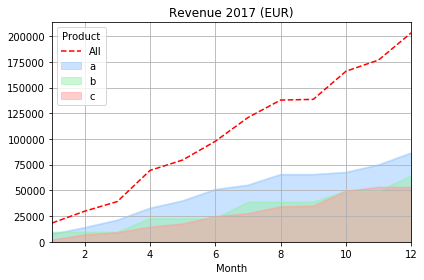

In [6]:
fig, ax = plt.subplots()

total_revenue = df.groupby('Month')['Amount'].sum().cumsum()
total_revenue.plot(ax=ax, style='r--', legend=True, label="All")
revenue.plot.area(title='Revenue 2017 (EUR)', ax=ax, stacked=False, grid=True)

fig.tight_layout()

In [11]:
df = pd.read_csv('05/demos/m4-advanced-plots/athletes.csv')

top = df.groupby('nationality')[['gold', 'silver', 'bronze']]\
    .sum().sort_values('gold', ascending=False)\
    .head(10)

df.head()

top

,gold,silver,bronze
nationality,,,
USA,139,54,71
GBR,64,55,26
RUS,52,29,34
GER,49,44,67
CHN,46,30,37
BRA,37,8,6
AUS,23,34,25
ARG,21,1,0
FRA,20,54,21


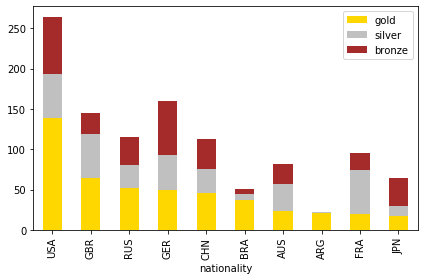

In [15]:
fig, ax = plt.subplots()
top.plot.bar(color=['gold', 'silver', 'brown'], ax=ax, stacked=True)
fig.tight_layout()